In [2]:
#!pip install weibull
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import weibull
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data/Trucks.csv')
data['suspended'] = data['Type'].map({'F':False, 'C':True})
data = data[data['Type']=='F'].sort_values(by='MTF')
data['index'] = range(1, len(data)+1)
print(data['Type'].value_counts())
data.head()

F    18
Name: Type, dtype: int64


,MTF,Type,suspended,index
6,5811,F,False,1
12,9760,F,False,2
17,14563,F,False,3
23,20432,F,False,4
24,24589,F,False,5


In [4]:
#Creating new column with y(i)

data['F[%]']= (data['index'] - 0.3) / (len(data)+0.4) 

data['ln(MTF)']= data['MTF'].apply(lambda x: np.log(x))
data['y'] = data['F[%]'].apply(lambda x: np.log(np.log(1/(1-x))))
data

,MTF,Type,suspended,index,F[%],ln(MTF),y
6,5811,F,False,1,0.038043,8.667508,-3.249695
12,9760,F,False,2,0.092391,9.186048,-2.333643
17,14563,F,False,3,0.146739,9.586239,-1.840803
23,20432,F,False,4,0.201087,9.924858,-1.493865
24,24589,F,False,5,0.255435,10.110054,-1.220933
13,25778,F,False,6,0.309783,10.157277,-0.992231
19,28020,F,False,7,0.364130,10.240674,-0.792389
15,28234,F,False,8,0.418478,10.248282,-0.612292
4,31017,F,False,9,0.472826,10.342291,-0.445936
1,32903,F,False,10,0.527174,10.401319,-0.288979


Gradient (Beta):  1.6517949617670538
T : 43038.701760112825
Intercept:  -17.624412782684384
R2: 0.9916993262170529


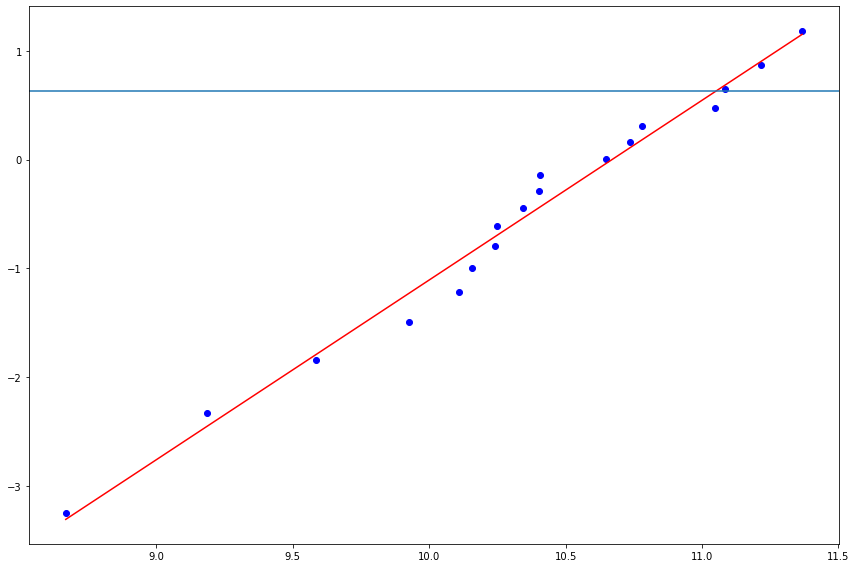

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

x=data['ln(MTF)'].values
y=data['y'].values

def get_lin_reg(x,y):
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print('Gradient (Beta): ', gradient)
    print('T :', np.exp(-(intercept/gradient)))
    print('Intercept: ', intercept)
    
    print('R2:', r_value)

    mn=np.min(x)
    mx=np.max(x)

    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    
    plt.plot(x,y,'ob')
    plt.plot(x1,y1,'-r')
    plt.axhline(y=0.632)
    plt.show()

get_lin_reg(x,y)

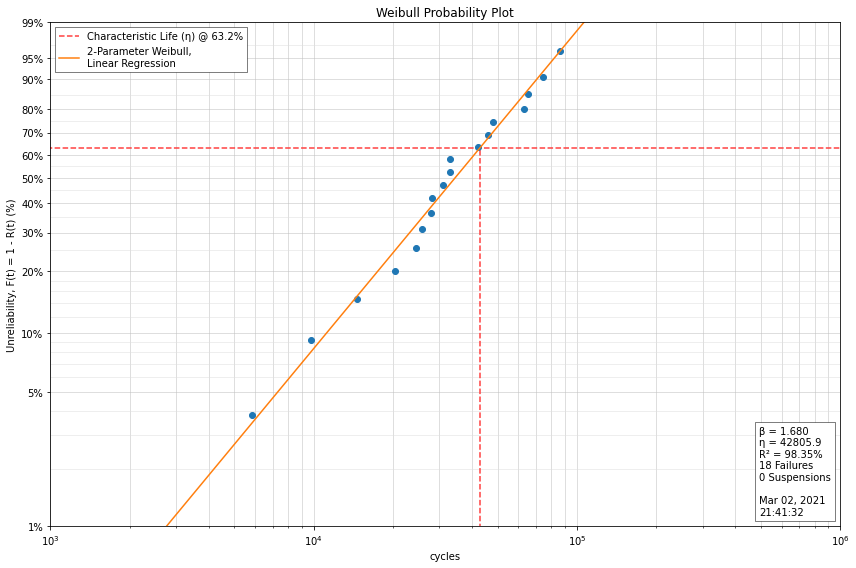


beta:  1.68
eta:  42805.95

B10 life: 11210

 r_squared                    0.983468
p_value                   1.10411e-15
fit method          linear regression
confidence                       0.95
beta lower limit               1.1629
beta nominal                  1.67956
beta upper limit              2.42576
eta lower limit               31963.2
eta nominal                   42805.9
eta upper limit               57326.9
dtype: object


In [6]:
#Using Weibull
import weibull

analysis = weibull.Analysis(data['MTF'].values, unit='cycle')

#Training the model
analysis.fit(confidence_level=0.95)

#Plotting Probability plot
analysis.probplot()

#Printing results
print(f'\nbeta: {analysis.beta: .02f}')
print(f'eta: {analysis.eta: .02f}')

print(f'\nB10 life: {analysis.b(10):.0f}')

print('\n',analysis._fit_test)

# Example 1 from conti

   ti_miles  ind     Fi(%)  ln(ti_miles)         y
0      20.0    1  0.074468      2.995732 -2.558941
4      30.0    2  0.180851      3.401197 -1.611994
7      50.0    3  0.287234      3.912023 -1.082929
1      75.0    4  0.393617      4.317488 -0.692660
5      95.0    5  0.500000      4.553877 -0.366513
2     100.0    6  0.606383      4.605170 -0.070018
8     130.0    7  0.712766      4.867534  0.221108
3     150.0    8  0.819149      5.010635  0.536541
6     180.0    9  0.925532      5.192957  0.954505
Gradient (Beta):  1.4688532554802847
T : 106.77577396995733
Intercept:  -6.860618530750177
R2: 0.9904990822154285


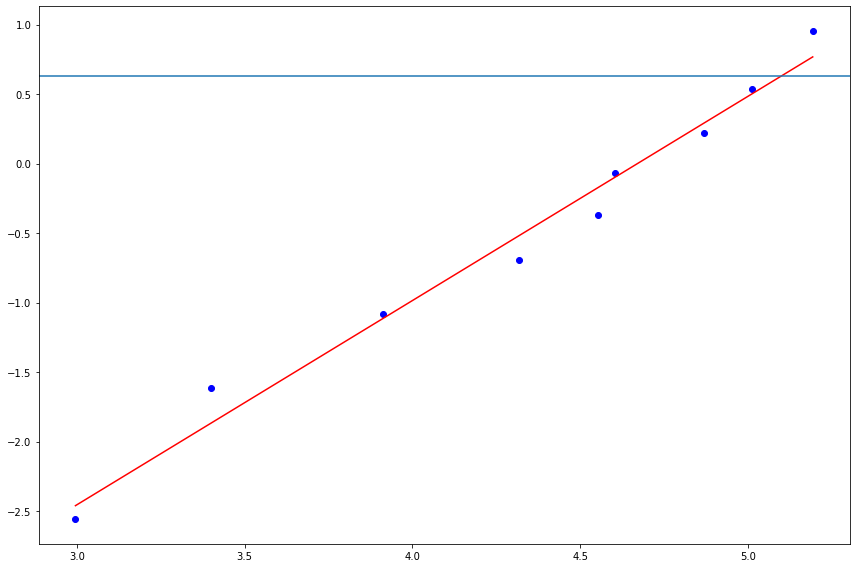

In [7]:
ti_miles = [20.0, 75.0, 100.0, 150.0, 30.0, 95.00, 180.00, 50.00, 130.00]
df = pd.DataFrame({'ti_miles':ti_miles}).sort_values(by='ti_miles')
df['ind'] = range(1,len(df)+1)
df['Fi(%)'] = df['ind'].apply(lambda x: (x-0.3)/(len(df)+0.4))
df['ln(ti_miles)']= df['ti_miles'].apply(lambda x: np.log(x))
df['y']= df['Fi(%)'].apply(lambda x: np.log(np.log(1/(1-x))))
print(df)

x=df['ln(ti_miles)'].values
y=df['y'].values

get_lin_reg(x, y)

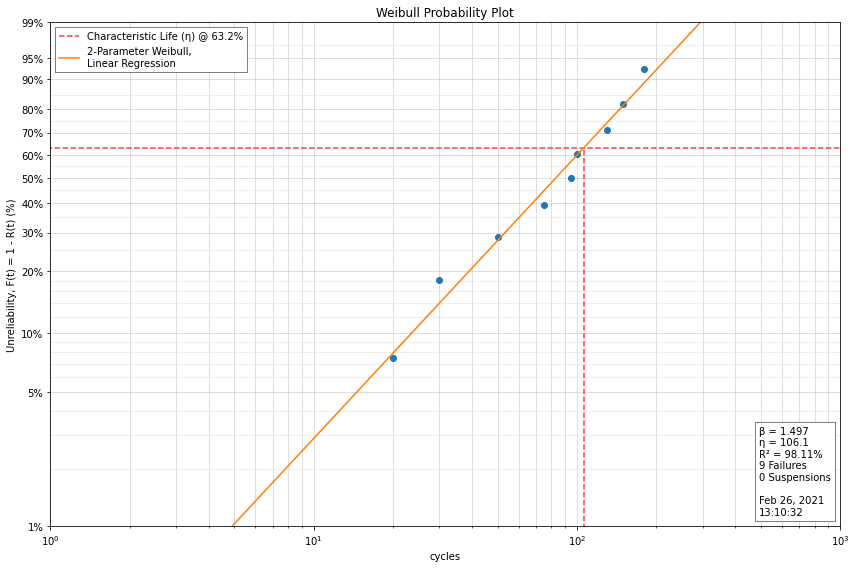


beta:  1.50
eta:  106.06

B10 life: 24

 r_squared                    0.981088
p_value                   2.72708e-07
fit method          linear regression
confidence                       0.95
beta lower limit             0.860624
beta nominal                  1.49717
beta upper limit              2.60452
eta lower limit               65.8603
eta nominal                   106.065
eta upper limit               170.812
dtype: object


In [104]:
#Using Weibull
import weibull

analysis = weibull.Analysis(df['ti_miles'].values, unit='cycle')

#Training the model
analysis.fit(confidence_level=0.95)

#Plotting Probability plot
analysis.probplot()

#Printing results
print(f'\nbeta: {analysis.beta: .02f}')
print(f'eta: {analysis.eta: .02f}')

print(f'\nB10 life: {analysis.b(10):.0f}')

print('\n',analysis._fit_test)

# Example 2 

   ti_miles  ind     Fi(%)  ln(ti_miles)         y
0        16    1  0.109375      2.772589 -2.155616
1        34    2  0.265625      3.526361 -1.175270
2        53    3  0.421875      3.970292 -0.601544
3        75    4  0.578125      4.317488 -0.147287
4        93    5  0.734375      4.532599  0.281918
5       120    6  0.890625      4.787492  0.794337
Gradient (Beta):  1.4269671106041935
T : 76.34541545544332
Intercept:  -6.186284828019506
R2: 0.9955808132765158


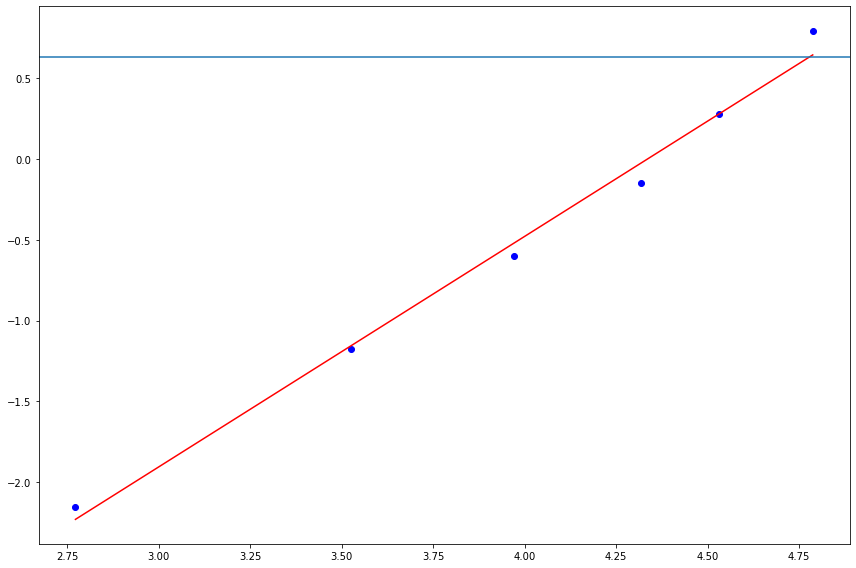

In [105]:
ti_miles = [16,34,53,75,93,120]
df = pd.DataFrame({'ti_miles':ti_miles}).sort_values(by='ti_miles')
df['ind'] = range(1,len(df)+1)
df['Fi(%)'] = df['ind'].apply(lambda x: (x-0.3)/(len(df)+0.4))
df['ln(ti_miles)']= df['ti_miles'].apply(lambda x: np.log(x))
df['y']= df['Fi(%)'].apply(lambda x: np.log(np.log(1/(1-x))))
print(df)

x=df['ln(ti_miles)'].values
y=df['y'].values

get_lin_reg(x, y)

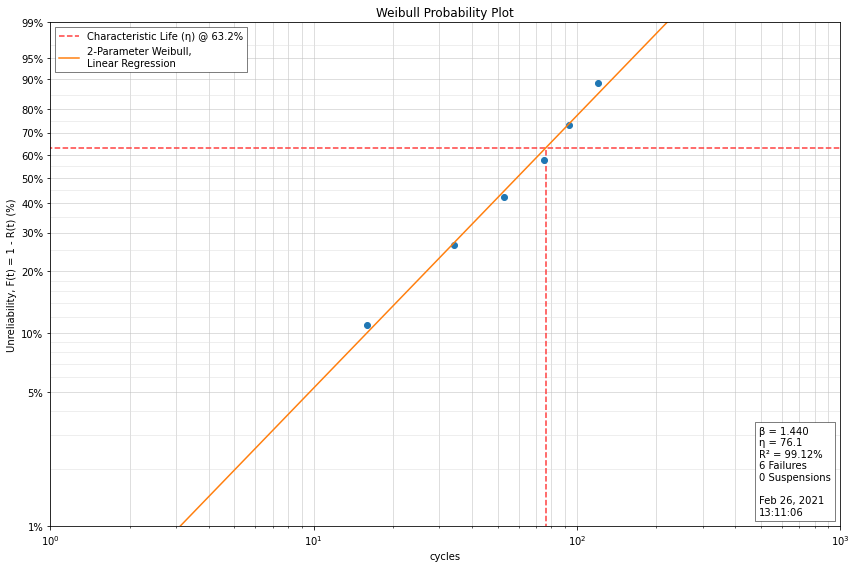


beta:  1.44
eta:  76.11

B10 life: 16

 r_squared                    0.991181
p_value                   2.92507e-05
fit method          linear regression
confidence                       0.95
beta lower limit             0.721708
beta nominal                  1.43966
beta upper limit              2.87184
eta lower limit               40.7095
eta nominal                   76.1096
eta upper limit               142.293
dtype: object


In [106]:
#Using Weibull
import weibull

analysis = weibull.Analysis(df['ti_miles'].values, unit='cycle')

#Training the model
analysis.fit(confidence_level=0.95)

#Plotting Probability plot
analysis.probplot()

#Printing results
print(f'\nbeta: {analysis.beta: .02f}')
print(f'eta: {analysis.eta: .02f}')

print(f'\nB10 life: {analysis.b(10):.0f}')

print('\n',analysis._fit_test)

# Ex3

   ti_miles  ind     Fi(%)  ln(ti_miles)         y
0        20    1  0.074468      2.995732 -2.558941
1        60    2  0.180851      4.094345 -1.611994
2        70    3  0.287234      4.248495 -1.082929
3        90    4  0.393617      4.499810 -0.692660
4       100    5  0.500000      4.605170 -0.366513
5       220    6  0.606383      5.393628 -0.070018
6       400    7  0.712766      5.991465  0.221108
7       480    8  0.819149      6.173786  0.536541
8       500    9  0.925532      6.214608  0.954505
Gradient (Beta):  0.9729873455344918
T : 231.92217454791557
Intercept:  -5.299280089306455
R2: 0.9714346627267032


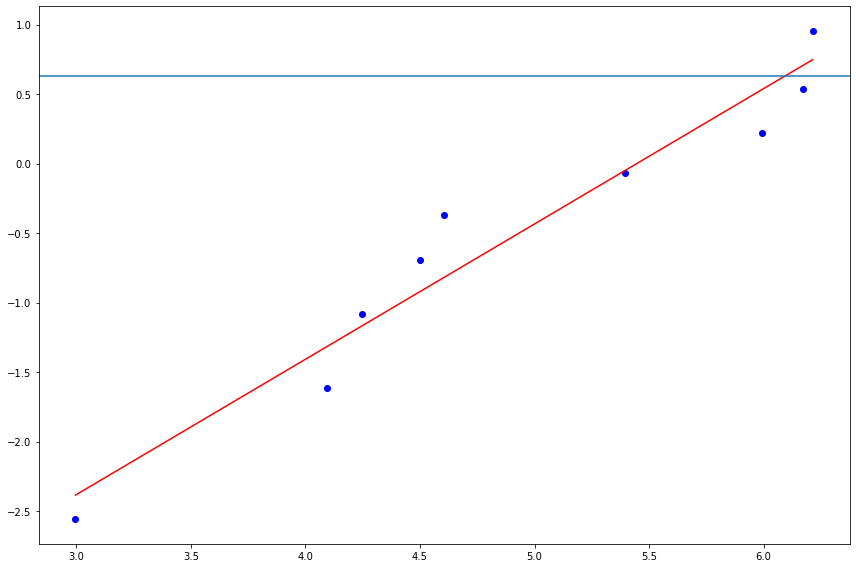

In [107]:
ti_miles = [20,60,70,90,100,220,400,480,500]
df = pd.DataFrame({'ti_miles':ti_miles}).sort_values(by='ti_miles')
df['ind'] = range(1,len(df)+1)
df['Fi(%)'] = df['ind'].apply(lambda x: (x-0.3)/(len(df)+0.4))
df['ln(ti_miles)']= df['ti_miles'].apply(lambda x: np.log(x))
df['y']= df['Fi(%)'].apply(lambda x: np.log(np.log(1/(1-x))))
print(df)

x=df['ln(ti_miles)'].values
y=df['y'].values

get_lin_reg(x, y)

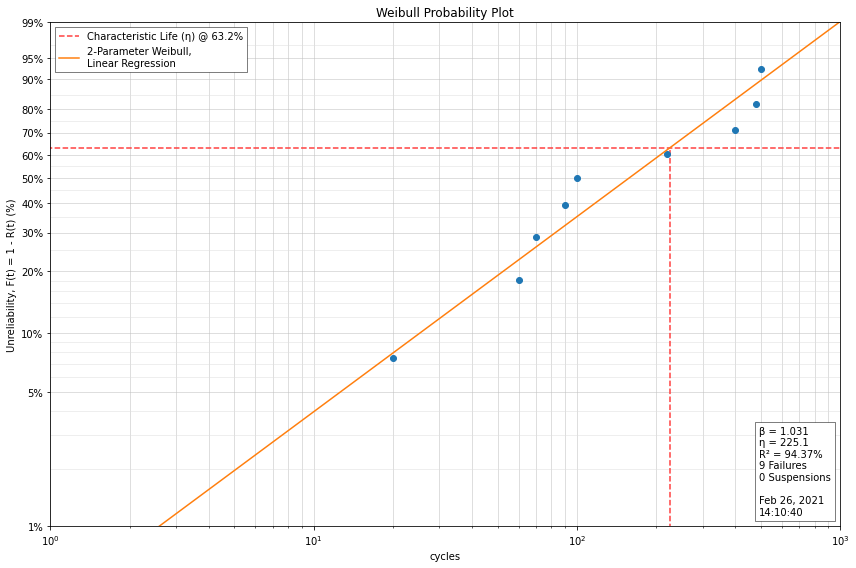


beta:  1.03
eta:  225.06

B10 life: 25

 r_squared                    0.943685
p_value                    1.2614e-05
fit method          linear regression
confidence                       0.95
beta lower limit             0.607462
beta nominal                  1.03105
beta upper limit              1.75001
eta lower limit               114.569
eta nominal                   225.059
eta upper limit               442.104
dtype: object


In [108]:
#Using Weibull
import weibull

analysis = weibull.Analysis(df['ti_miles'].values, unit='cycle')

#Training the model
analysis.fit(confidence_level=0.95)

#Plotting Probability plot
analysis.probplot()

#Printing results
print(f'\nbeta: {analysis.beta: .02f}')
print(f'eta: {analysis.eta: .02f}')

print(f'\nB10 life: {analysis.b(10):.0f}')

print('\n',analysis._fit_test)

# Example with suspeded

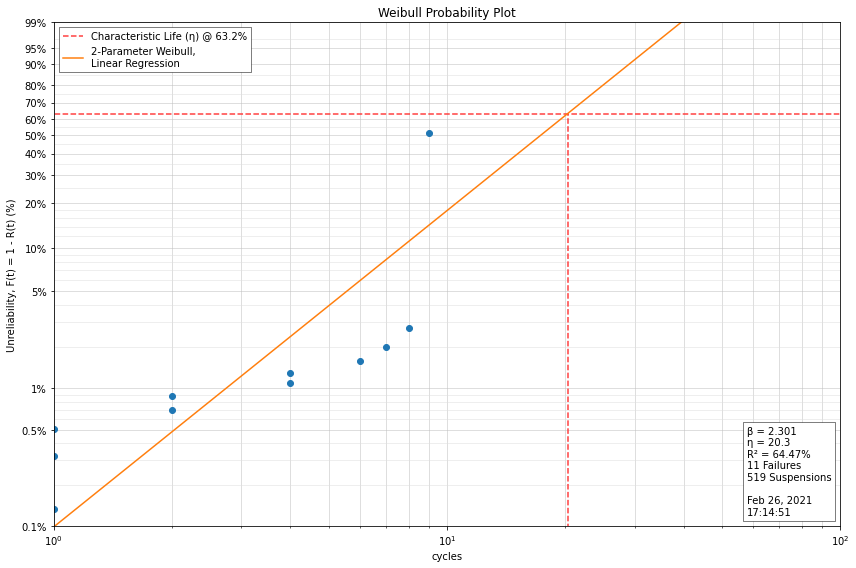


beta:  2.30
eta:  20.27

B10 life: 8

 r_squared                    0.644686
p_value                    0.00292417
fit method          linear regression
confidence                       0.95
beta lower limit              1.98896
beta nominal                  2.30114
beta upper limit              2.66231
eta lower limit               17.7231
eta nominal                   20.2682
eta upper limit               23.1788
dtype: object


In [146]:
months=[9,8,7,6,5,4]
suspended_vol = [78,99,118,98,80,46]
months_l=[]
susp=[]

for i in range(len(months)):
    months_l=np.concatenate([months_l,[months[i]]*suspended_vol[i]])

susp = [True]*len(months_l)

months_l = np.concatenate([months_l,  [1, 1, 1, 2, 2 ,4,4,6,7,8,9]])
susp = np.concatenate([susp, [False]*len([1, 1, 1, 2, 2 ,4,4,6,7,8,9])])

analysis = weibull.Analysis(list(months_l), suspended=list(susp), unit='cycle')

#Training the model
#analysis.fit(method= 'mle', confidence_level=0.95)
analysis.fit(confidence_level=0.95)

#Plotting Probability plot
analysis.probplot()

#Printing results
print(f'\nbeta: {analysis.beta: .02f}')
print(f'eta: {analysis.eta: .02f}')

print(f'\nB10 life: {analysis.b(10):.0f}')

print('\n',analysis._fit_test)

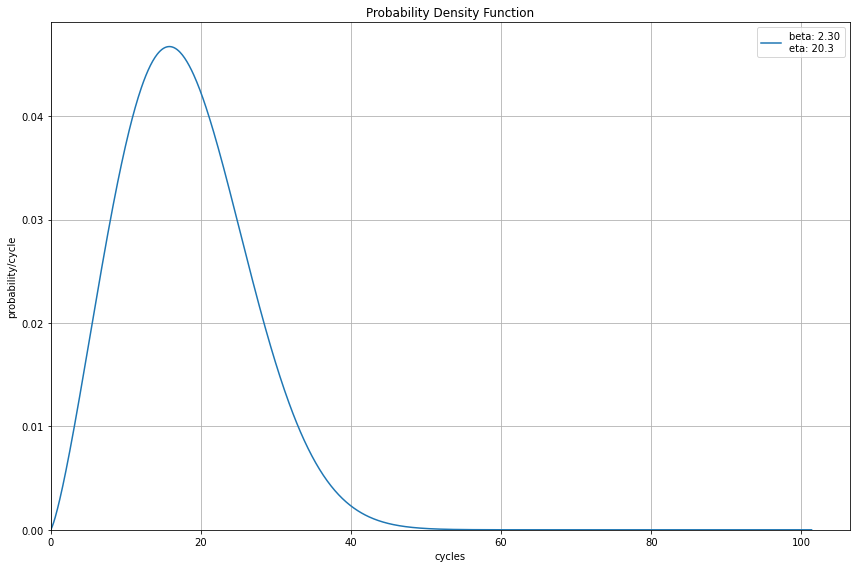

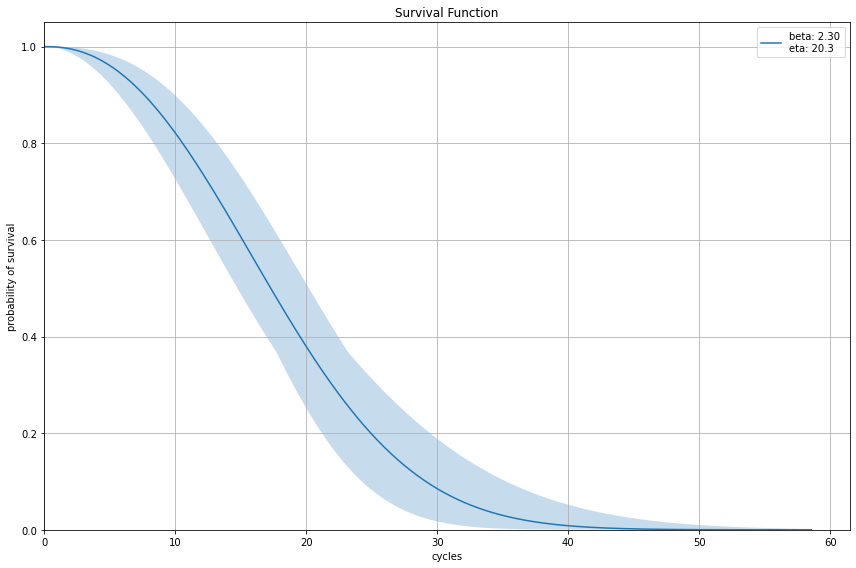

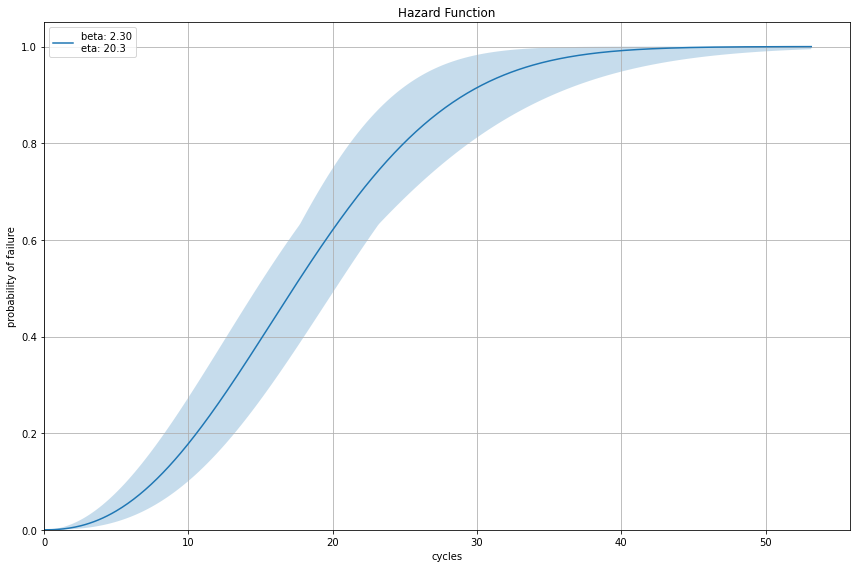

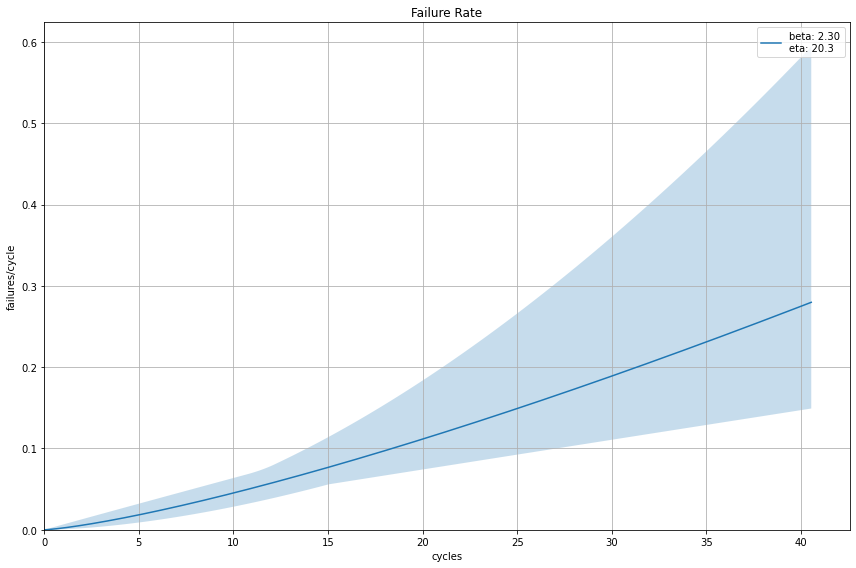

In [145]:
analysis.pdf()      # probability density function
analysis.sf()       # survival function
analysis.hazard()   # hazard function
#analysis.cdf()      # cumulative distribution function
analysis.fr()       # failure rate

In [144]:
df= pd.DataFrame({'months':months_l, 'suspended':susp})
df['susp'] = df.suspended.map({True: 'C', False:'F'})
df.to_csv('data/months_data.csv')